In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
df = pd.read_csv('Match_History_Details.csv')
df.drop(columns = 'Unnamed: 0', inplace = True)

In [3]:
df.head()

,GameId,Duration,Team1_Barons,Team1_Dragons,Team2_Barons,Team2_Dragons,Team1_Player1_Champion,Team1_Player2_Champion,Team1_Player3_Champion,Team1_Player4_Champion,...,Team1_Player1_Lane,Team1_Player2_Lane,Team1_Player3_Lane,Team1_Player4_Lane,Team1_Player5_Lane,Team2_Player1_Lane,Team2_Player2_Lane,Team2_Player3_Lane,Team2_Player4_Lane,Team2_Player5_Lane
0,3084513429,1540,0,0,1,2,86,37,268,81,...,TOP,BOTTOM,MIDDLE,BOTTOM,JUNGLE,TOP,MIDDLE,BOTTOM,JUNGLE,BOTTOM
1,3084446759,1642,0,4,1,0,99,29,23,113,...,BOTTOM,BOTTOM,TOP,JUNGLE,MIDDLE,BOTTOM,JUNGLE,JUNGLE,MIDDLE,BOTTOM
2,3084435694,1046,0,0,0,2,30,134,236,80,...,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE
3,3083216368,1614,0,1,1,3,92,4,9,246,...,TOP,MIDDLE,BOTTOM,JUNGLE,BOTTOM,BOTTOM,JUNGLE,MIDDLE,BOTTOM,TOP
4,3083201609,1444,1,2,0,0,15,350,113,61,...,BOTTOM,BOTTOM,JUNGLE,MIDDLE,TOP,JUNGLE,BOTTOM,TOP,MIDDLE,BOTTOM


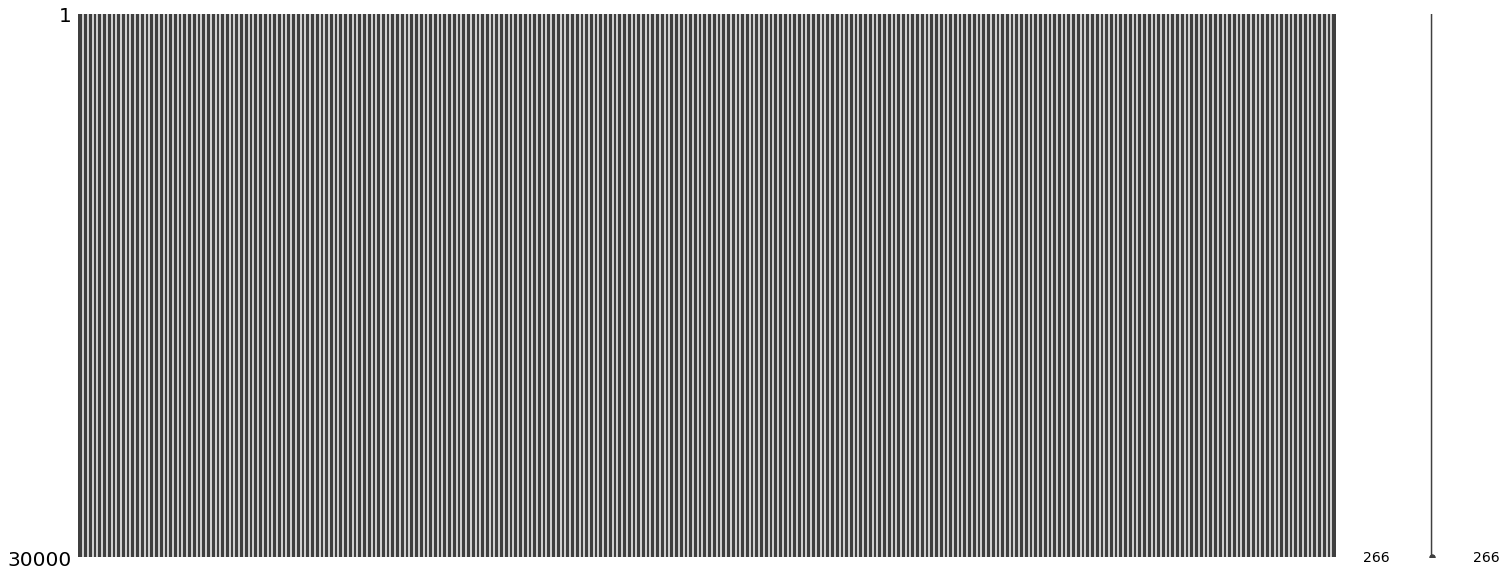

In [15]:
# To see if I am missing any info in my data, I use MissingNo to validate I have all the info in my data
msno.matrix(df)

# In order to assess the playstyles of the different lanes, I am going to use K-Means clustering for each lane

Creating a function to pull out the necessary columns to cluster on for each lane. Since each lane contains 10 players, I am going to iterate through each player column to pull up the necessary info and overlay all the info into consolidated columns

In [10]:
def lane(lane_name):
    players = ['Team1_Player1', 'Team1_Player2', 'Team1_Player3', 'Team1_Player4', 'Team1_Player5',
              'Team2_Player1', 'Team2_Player2', 'Team2_Player3', 'Team2_Player4', 'Team2_Player5']

    df2 = pd.DataFrame()
    for player in players:
        rift = df.query("{}_Lane == '{}'".format(player, lane_name))[
            ['{}_Lane'.format(player), '{}_Summoner'.format(player), '{}_Champion'.format(player),
            '{}_Kills'.format(player), '{}_Deaths'.format(player),'{}_Assists'.format(player), 
             '{}_Killing_Spree'.format(player), '{}_Multikills'.format(player), '{}_Total_Damage'.format(player),
             '{}_Damage_To_Objectives'.format(player), '{}_Damage_To_Turrets'.format(player), 
             '{}_Damage_Taken'.format(player), '{}_Gold_Earned'.format(player), '{}_Champ_Level'.format(player),
             '{}_Wards_Bought'.format(player), '{}_Vision_Score'.format(player), '{}_Crowd_Control'.format(player),
             '{}_Item0'.format(player),'{}_Item1'.format(player), '{}_Item3'.format(player),
             '{}_Item4'.format(player), '{}_Item5'.format(player), '{}_Item6'.format(player)]]
        rift.rename(columns = {"{}_Lane".format(player): "Lane", 
                              "{}_Champion".format(player): "Champion",
                              "{}_Summoner".format(player): "Summoner",
                              "{}_Kills".format(player): "Kills",
                              "{}_Deaths".format(player): "Deaths", 
                              "{}_Assists".format(player): "Assists", 
                              "{}_Killing_Spree".format(player): "Killing_Spree",
                              "{}_Multikills".format(player): "Multikills",
                              "{}_Total_Damage".format(player): "Total_Damage",
                              "{}_Damage_To_Objectives".format(player): "Damage_To_Objectives", 
                              "{}_Damage_To_Turrets".format(player): "Damage_To_Turrets",
                              "{}_Damage_Taken".format(player): "Damage_Taken",
                              "{}_Gold_Earned".format(player): "Gold_Earned",
                              "{}_Champ_Level".format(player): "Champ_Level",
                              "{}_Wards_Bought".format(player): "Wards_Bought",
                              "{}_Vision_Score".format(player): "Vision_Score",
                              "{}_Crowd_Control".format(player): "Crowd_Controls", 
                              "{}_Item0".format(player): "Item_0",
                              "{}_Item1".format(player): "Item_1",
                              "{}_Item2".format(player): "Item_2",
                              "{}_Item3".format(player): "Item_3",
                              "{}_Item4".format(player): "Item_4",
                              "{}_Item5".format(player): "Item_5",
                              "{}_Item6".format(player): "Item_6",}, inplace = True)
        df2 = pd.concat([df2,rift])
    return df2

In [14]:
top = lane('TOP')
jungle = lane('JUNGLE')
middle = lane('MIDDLE')
bot = lane('BOTTOM')
support = lane('NONE')

In [18]:
top.to_csv('Top_lane.csv')
jungle.to_csv('Jungle.csv')
middle.to_csv('Mid_lane.csv')
bot.to_csv('Bot_lane.csv')
support.to_csv('Support.csv')

In [19]:
middle.head()

,Lane,Summoner,Champion,Kills,Deaths,Assists,Killing_Spree,Multikills,Total_Damage,Damage_To_Objectives,...,Champ_Level,Wards_Bought,Vision_Score,Crowd_Controls,Item_0,Item_1,Item_3,Item_4,Item_5,Item_6
12,MIDDLE,FmLy7ZnFG4rASusicbskDIxXnmKqnZroa1pjxQHSpB1PIQ,68,6,5,4,3,2,14191,3752,...,13,3,20,10,0,2031,3020,3151,1054,3364
13,MIDDLE,eBir9AyELV8P4RlW7v3y-SPnKMFCIqm_bhpa4sZarocTI08,4,4,8,8,0,1,11247,1189,...,13,2,17,25,3111,2031,2421,3100,0,3340
18,MIDDLE,CdvbZGOaUL2ZdkQ2q_sN7Dfj6U-j43AIvQNMfgxYz5E26X...,163,7,11,2,5,2,31819,8187,...,16,3,19,29,3117,3151,1082,3165,3285,3340
23,MIDDLE,8mxGxOaBn8_NieSC3zfSK-qFSrYI7GnTqF2GZBo8x9ex_vI,39,4,7,3,2,1,12736,4893,...,14,2,18,10,3078,2033,3047,3053,3052,3363
28,MIDDLE,OnvXwXtBoDG_huG715XZ1WsxiLhO4_n8QfI5lvuXvZZ1qx...,27,1,2,9,0,1,8928,7027,...,13,1,13,19,2033,3512,1056,3116,3047,3340


In [20]:
top.head()

,Lane,Summoner,Champion,Kills,Deaths,Assists,Killing_Spree,Multikills,Total_Damage,Damage_To_Objectives,...,Champ_Level,Wards_Bought,Vision_Score,Crowd_Controls,Item_0,Item_1,Item_3,Item_4,Item_5,Item_6
0,TOP,yg3qpH1LSRyaIj4upID3RlUiQo3X_n3abZQ4TYRTquUEUQ,86,4,3,9,3,1,12374,3836,...,14,0,12,31,3512,1031,0,3071,3047,3340
3,TOP,qh2UCzLr-OBGB8sqUmErf7OVljvHFHHdeT6buVsh9ezrY58,92,9,7,1,4,1,15022,3893,...,15,3,20,26,3812,3071,1053,3047,1036,3340
8,TOP,xZllBInoF5UYOeC_J6ajwRfaQVXhWuT3MKuQcst6XQcX_g,518,3,6,4,2,1,16640,19544,...,15,0,18,25,1018,3153,3123,3085,1037,3340
11,TOP,yimetSwPS-curk6lVVCElRNYeHOetN7EH22mmijnZfWvlE0,39,6,10,3,3,2,17448,3386,...,17,5,19,10,1057,3748,3053,3078,3047,3340
14,TOP,pABgmovHF4o0fkvV07C0tyAMO4ohie9lgkV3kNymHXscIS...,13,4,3,8,2,2,13014,7945,...,13,2,15,12,3040,3907,0,0,3158,3340


In [21]:
jungle.head()

,Lane,Summoner,Champion,Kills,Deaths,Assists,Killing_Spree,Multikills,Total_Damage,Damage_To_Objectives,...,Champ_Level,Wards_Bought,Vision_Score,Crowd_Controls,Item_0,Item_1,Item_3,Item_4,Item_5,Item_6
20,JUNGLE,6ltVqVNnOZQMy3B3AYXHWEETA-Yn4JSJY5bt78Y0mYDKcDk,59,4,8,12,0,1,9851,15310,...,13,5,41,18,1412,3111,3052,1028,3071,3364
22,JUNGLE,UT0pJcxakrKG8C9gi0FmeYmO6LBuoDESIW8hCuws-QgSwQ,106,5,3,11,2,1,11734,22331,...,16,6,37,25,3065,1401,0,3742,3076,3364
24,JUNGLE,9G3n80KPcJKrBuy0MWHtem2CW_bUH5GC_0Ur3KPK9BQBx_A,17,7,8,24,3,1,37916,28477,...,18,2,26,47,3916,3115,3151,1402,0,3364
27,JUNGLE,Qew7WMQbo3feeC9CdZhrfXmqWyuGxmGPDrqVpx_RcZAidw,498,2,3,3,2,1,15450,2111,...,12,3,22,10,2055,1055,3006,3508,3031,3363
29,JUNGLE,PThd5ozfrVQsphfVI6M7DZZJpi3RLjcRGwqTaIk8RTJ6rEA,107,9,11,11,2,1,27099,28451,...,17,3,64,15,3077,3071,3026,3111,3147,3364


In [23]:
bot.head()

,Lane,Summoner,Champion,Kills,Deaths,Assists,Killing_Spree,Multikills,Total_Damage,Damage_To_Objectives,...,Champ_Level,Wards_Bought,Vision_Score,Crowd_Controls,Item_0,Item_1,Item_3,Item_4,Item_5,Item_6
1,BOTTOM,dej3UtMSRFro-CMkBJY48ZjRdXUkunfagC6EZIf71KsUyQ,99,6,0,24,6,1,15582,4590,...,14,8,60,57,3222,3117,2055,3504,3174,3364
4,BOTTOM,6VsMZIVcdKAsnQjTEbAViFpHHb4veDIaydda_Xegy5wGMg,15,9,1,10,8,2,17915,17862,...,14,2,23,0,3006,3508,1038,1037,1055,3363
5,BOTTOM,8V5OP0u8AbbRuEzVj-Gj6o6zsILKJqVQLPvy6Y71L04HaQ,498,3,5,5,2,1,11968,5871,...,11,2,27,6,0,3094,3508,3006,1055,3363
6,BOTTOM,Sxw8CXoWTrxn6QL44K7SmrS0vYy6Kc1h9wgQ-RgmRx6mJSM,25,0,7,10,0,0,11120,1821,...,13,11,57,43,3092,3107,2055,3113,3067,3364
19,BOTTOM,CtDcz1QurYmY4gIBDLxkbIQ60tnmBFrsmUTT7-co-NdF0g,350,3,2,28,2,1,14093,9959,...,13,8,51,30,3174,3098,3041,3504,0,3364


In [24]:
support.head()

,Lane,Summoner,Champion,Kills,Deaths,Assists,Killing_Spree,Multikills,Total_Damage,Damage_To_Objectives,...,Champ_Level,Wards_Bought,Vision_Score,Crowd_Controls,Item_0,Item_1,Item_3,Item_4,Item_5,Item_6
2,NONE,9QiswKzg8q73OUQFXdJba0uaJ9LbWErmzKAn4XW0n9VK8A,30,3,3,3,0,2,9003,2836,...,11,0,14,9,1402,2031,3116,0,0,3340
7,NONE,F2-RIJW-55jLB-xRRQzZSonMdQWsPLZ5VVxiODCSNIkZQpk,43,1,4,1,0,1,7044,502,...,8,5,26,17,3504,2055,3020,1004,0,3364
9,NONE,TU6HRzE9PaKwAXhuTG6WP4SLVrB-3k8neY1OdLMg5HOe_m...,497,1,2,4,0,1,3300,1198,...,8,3,13,12,2055,2031,3024,1033,3117,3364
10,NONE,MwS-_nh3KfDguQneOW_-vkt82z9QnosFLYWu5aNmMb0-AgU,15,5,2,7,2,1,11130,2108,...,11,2,4,0,3031,3006,3508,0,0,3363
15,NONE,Pm3GFo04o5gj3Ct9yFsjwfvrz8QWIG750Y4mzumxKmhOUA,59,5,0,9,5,1,6604,12215,...,11,5,23,18,3143,1038,3047,0,1412,3364
